# Завдання
Застосуйте описані вище методи кластеризації на датасеті винних сортів UCI ML Wine Data Set.

## Рішення

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

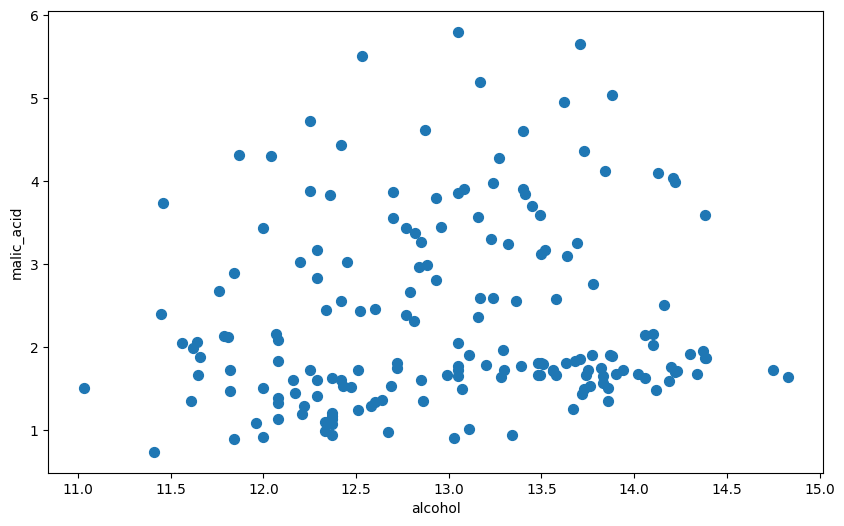

In [127]:
# завантаження датасету
wine = load_wine()
X = wine.data

# назви атрибутів
feature_names = wine.feature_names

# створення фрейму даних
df = pd.DataFrame(X, columns=feature_names)

# візуалізація даних
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=50)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

### Кластеризація методом k-середніх

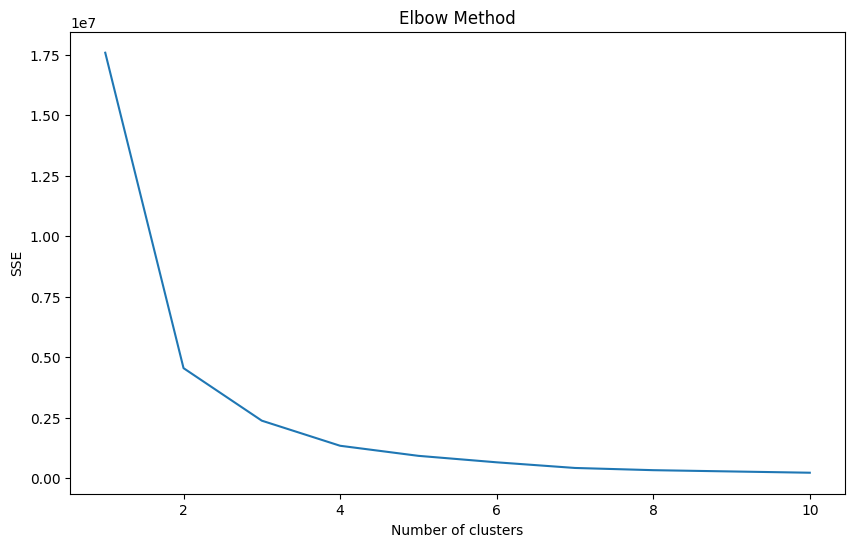

In [128]:
# визначення кількості кластерів методом "ліктя"
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2023, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

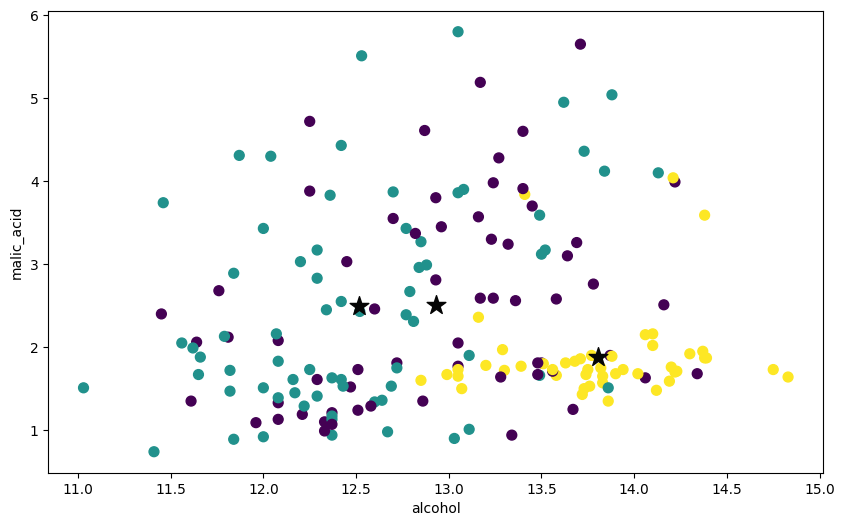

In [129]:
# кластеризація методом k-середніх
kmeans = KMeans(n_clusters=3, random_state=2023, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# візуалізація кластерів
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_labels, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='#050505')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

### Кластеризація методом DBSCAN

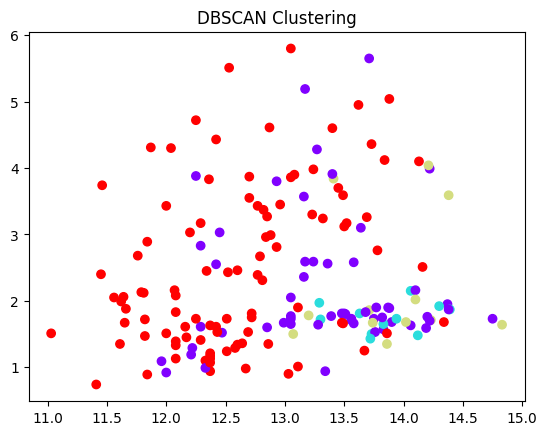

In [134]:
# кластеризація методом DBSCAN
dbscan = DBSCAN(eps=30, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X)

# візуалізація кластерів
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.show()

### Ієрархічна кластеризація

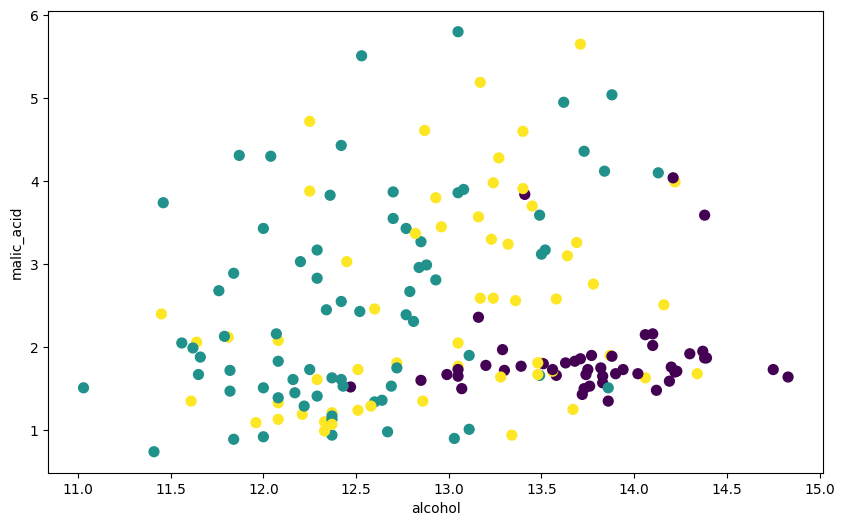

In [131]:
# кластеризація методом ієрархічної кластеризації
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# візуалізація кластерів
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=hierarchical_labels, s=50)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

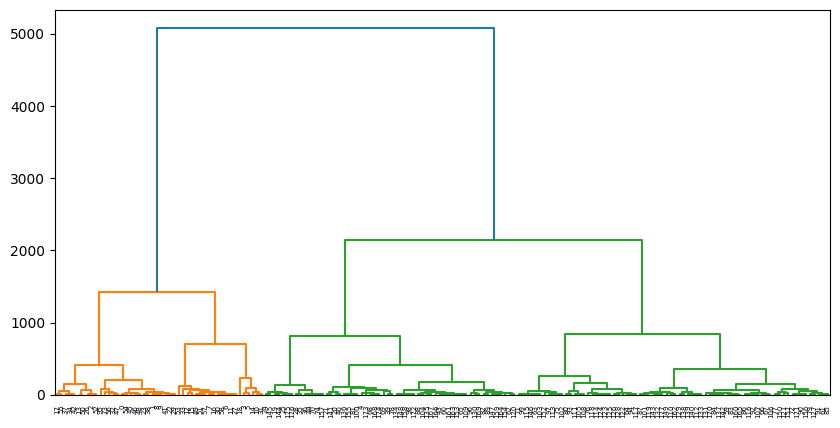

In [132]:
from scipy.cluster.hierarchy import dendrogram, linkage

all = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(10, 5))
dendrogram(all, leaf_rotation=90)
plt.show()